I need to check ulcer sizes in two different datasets and identify how it correlates with segmentation accuracy if at all

In [7]:
# Iterate through all the data in two datasets and collect ulcer sizes in pixels
import os
import cv2
import numpy as np

datasets = {
    'FUSeg':'D:/AKairys/Augmentation analysis/Augmentation test/wound-segmentation/data/Foot Ulcer Segmentation Challenge/data new/test/labels/',
    'Medetec':'D:/AKairys/Augmentation analysis/Augmentation test/wound-segmentation/Augmentation-test/data/Medetec_foot_ulcer_224/test/labels/'}

counts={}
for dataset in datasets:
    directory = datasets[dataset]
    # get all png files in a given directory
    files = [file for file in os.listdir(directory) if file.endswith('.png')]
    # create list to append
    counts[dataset]=[]
    # iterate through all files
    for file in files:
        # read labels as grayscale
        img = cv2.imread(directory+file, 0)
        # get max pixel value to understand what to count
        maxVal = np.max(img)
        counts[dataset].append(np.count_nonzero(img==maxVal))
        
        

In [8]:
counts

{'FUSeg': [2308,
  4344,
  6470,
  227,
  3781,
  1062,
  3430,
  729,
  615,
  3008,
  2378,
  2463,
  1446,
  114,
  105,
  1377,
  156,
  1616,
  1322,
  948,
  6374,
  675,
  664,
  1578,
  1683,
  2711,
  385,
  2298,
  326,
  4006,
  157,
  2191,
  74,
  2498,
  853,
  542,
  3053,
  408,
  5205,
  558,
  642,
  5147,
  3400,
  1582,
  262144,
  2505,
  1723,
  3416,
  1977,
  256,
  2012,
  12767,
  38,
  2849,
  235,
  511,
  13181,
  4615,
  624,
  3056,
  1664,
  16630,
  6073,
  6170,
  514,
  110,
  804,
  4916,
  8735,
  4165,
  7445,
  3566,
  1630,
  1757,
  1005,
  262144,
  2767,
  2500,
  1094,
  1159,
  133,
  457,
  8681,
  4212,
  324,
  231,
  150,
  1894,
  15102,
  3494,
  1322,
  3941,
  237,
  18853,
  1590,
  550,
  8142,
  197,
  992,
  3251,
  12108,
  8592,
  85],
 'Medetec': [5939,
  5946,
  5939,
  5946,
  4110,
  4108,
  4110,
  4108,
  1714,
  1711,
  1714,
  1711,
  6079,
  6076,
  6079,
  6076,
  5724,
  5727,
  5724,
  5727,
  5577,
  5564,
  5577,


------------FUSeg:
              Values
count     103.000000
mean     8021.398058
std     36121.041603
min        38.000000
25%       586.500000
50%      1723.000000
75%      3861.000000
max    262144.000000
------------Medetec:
             Values
count    152.000000
mean    5140.236842
std     3330.308917
min      919.000000
25%     2535.000000
50%     4918.000000
75%     6076.750000
max    16068.000000


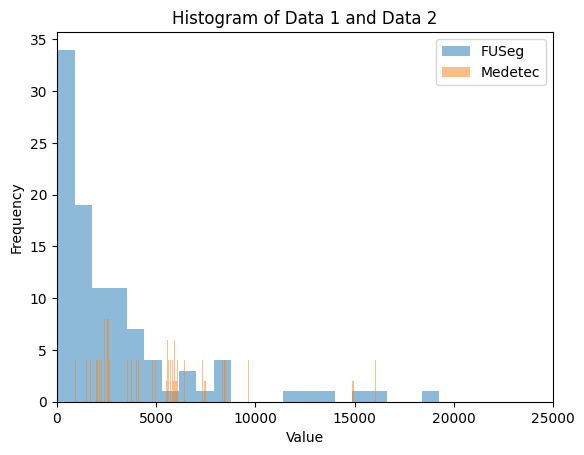

In [23]:
# plot the data on histograms
import matplotlib.pyplot as plt
import pandas as pd

for count in counts:
    df = pd.DataFrame(counts[count], columns=['Values'])
    print(f'------------{count}:\n{df.describe()}')
    plt.hist(counts[count], bins=300, alpha=0.5, label=count)
plt.xlabel('Value')
plt.xlim(0, 25000)
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of Data 1 and Data 2')
plt.show()

Apparently, FUSeg dataset test set have even smaller samples than Medetec and it is not the case that Medetec segmentation performance is poor due to sample size.